In [1]:
from geoband.API import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import json
from pandas import json_normalize
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geoband.API import *
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopandas import GeoDataFrame
# GetCompasData로 주피터 노트북 경로에 파일 저장
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [3]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') #한글 폰트 지정?

# 데이터 연결
1. 격자별 데이터 연결 : 격자별 데이터가 존재하는 경우
2. 좌표별 데이터 연결 : 좌표 데이터가 존재하는 경우 특정 격자에 연결
3. area 데이터 연결 : 격자에 걸친 area(면적)이 존재하는 경우

> ## 국토정보맵

## 1. 격자별 데이터 연결

In [93]:
# 수원시 격자별 총인구수
suwon_grid_people = gpd.read_file("nlsp_031001001.shp",encoding="utf-8")

# 수원시 격자별 총인구수 여자
suwon_grid_wman = gpd.read_file("nlsp_031001003.shp",encoding="utf-8")

# 수원시 격자별 총인구수 남자
suwon_grid_man = gpd.read_file("nlsp_031001002.shp",encoding="utf-8")

# 수원시 격자별 총인구수 중학생
suwon_grid_mid = gpd.read_file("nlsp_031001019.shp",encoding="utf-8")

# 수원시 격자별 총인구수 고등학생
suwon_grid_high = gpd.read_file("nlsp_031001022.shp",encoding="utf-8")

# 수원시 격자별 총인구수 고령자
suwon_grid_old = gpd.read_file("nlsp_031001010.shp",encoding="utf-8")

# 수원시 격자별 총인구수 20대
suwon_grid_20 = gpd.read_file("nlsp_031001025.shp",encoding="utf-8")

# 수원시 격자별 주거용도건축물면적
suwon_grid_live = gpd.read_file("nlsp_031005004.shp",encoding="utf-8")

# 수원시 격자별 주거용도(단독)
suwon_grid_house = gpd.read_file("nlsp_031002022.shp",encoding="utf-8")

# 수원시 격자별 주거용도(공동)
suwon_grid_apt = gpd.read_file("nlsp_031002023.shp",encoding="utf-8")

# 수원시 격자별 주거용도(용적률)
suwon_grid_floor = gpd.read_file("nlsp_031002010.shp",encoding="utf-8")

# 수원시 격자별 35년 이상 건축물
suwon_grid_35old = gpd.read_file("nlsp_031002020.shp",encoding="utf-8")

# 수원시 격자별 30년 이상 ~ 35년 미만 건축물
suwon_grid_30old = gpd.read_file("nlsp_031002019.shp",encoding="utf-8")

# 수원시 격자별 총 건축물
suwon_grid_all = gpd.read_file("nlsp_031002021.shp",encoding="utf-8")

# 수원시 격자별 개별주택가격
suwon_grid_price = gpd.read_file("nlsp_031005001.shp",encoding="utf-8")

# 수원시 격자정보
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

data_lst = [suwon_grid_people, suwon_grid_wman, suwon_grid_man, suwon_grid_mid, suwon_grid_high,
            suwon_grid_old, suwon_grid_20, suwon_grid_live, suwon_grid_house, suwon_grid_apt, suwon_grid_floor,
            suwon_grid_35old, suwon_grid_30old, suwon_grid_all, suwon_grid_price]

data_name_lst = ["총인구수","여자인구수","남자인구수","중학생수","고등학생수","고령자수","20대수",
                "주거용건축물면적","단독주거건축물","공동주거건축물","주거용도용적률","35년이상건축물수",
                "30~34년건축물수","총건축물수","개별주택가격"]

result_lst = []

데이터 불러온 뒤
- 좌표계 epsg:4326 변환
- 컬럼명 수정하기

In [94]:
def clear_grid_data(data,col):
    test = gpd.GeoDataFrame(data)
    test = test.to_crs(epsg="4326")
    # 좌표계 변환

    test = test.rename(columns={"val":col})
    # col로 "val"열의 이름 변경
    # col : 우리가 설정하는 이름 ex) 총인구수
    
    return test.drop("lbl",axis=1).fillna(0)

총 15개의 격자데이터 함수 돌리기
- data_lst : 15개의 격자 데이터 원본
- data_name_lst : 15개의 격자 데이터 명
- result_lst : 변환된 데이터 넣어주기

In [95]:
result_merge = suwon_112_grid

for i in range(len(data_lst)):
    result = clear_grid_data(data_lst[i],data_name_lst[i])
    result_lst.append(result)
    # clear_grid_data 처리해준 데이터
    
    result_merge = pd.merge(result_merge,result.drop("geometry",axis=1),on=["gid"],how="inner")
    # suwon_112_grid 에 격자별 데이터 계속 덧붙여주기

추가변수 가공하기
- 청년수 = 중학생수 + 고등학생수 + 20대 수
- 노후건물 비율

In [96]:
result_merge["청년수"] = result_merge["중학생수"] + result_merge["고등학생수"] + result_merge["20대수"]

result_merge["30년이상건축물수"] = result_merge["35년이상건축물수"] + result_merge["30~34년건축물수"] + result_merge["20대수"]
result_merge["30년이상건축물비율"] = result_merge["30년이상건축물수"] / result_merge["총건축물수"] 

result_merge.drop(["중학생수","고등학생수","20대수"],axis=1,inplace=True).fillna(0)

result_merge["단독주거건축물비율"] = result_merge["단독주거건축물"] / result_merge["총건축물수"]
result_merge["공동주거건축물비율"] = result_merge["공동주거건축물"] / result_merge["총건축물수"]

In [97]:
result_merge.head(2)

,gid,geometry,총인구수,여자인구수,남자인구수,고령자수,주거용건축물면적,단독주거건축물,공동주거건축물,주거용도용적률,35년이상건축물수,30~34년건축물수,총건축물수,개별주택가격,청년수,30년이상건축물수,30년이상건축물비율
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,다사49aa19ba,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


> ## 시간대별_성별_요일별 유동인구
- 년월 단위이니까 월별로 평균?
- point_grid 함수 이용해서 일단 격자에 매핑해주기(유동인구 데이터 좌표로 주어짐)

### gid별로 월평균 내기 전에 이 상태에서 다양한 시각화 그림 뽑아낼 수 있을 듯 
- 몇월에 어느지역에서 유동인구가 많은지?

In [142]:
def point_grid(data_df,suwon_grid,col="None"):
    df = data_df.copy()
    if "geometry" in df.columns:
        pass
    else:
        epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
        df['Point'] = df.apply(lambda x : Point([x['lon'], x['lat']]), axis=1)
        df = gpd.GeoDataFrame(df, geometry='Point', crs = epsg4326)
        
    gid_result = gpd.sjoin(suwon_grid, df, how='left', op="intersects").drop(["index_right"],axis=1)
    
    return gid_result

In [110]:
# 수원시 격자정보
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

time_sex_weekday_pop = pd.read_csv("시간대_성별_요일별_유동인구.csv")
print(time_sex_weekday_pop.columns)

Index(['월요일유동인구', '화요일유동인구', '수요일유동인구', '목요일유동인구', '금요일유동인구', '토요일유동인구',
       '일요일유동인구', 'lon', 'lat', '년', '월', '0시기준_측정정보', '1시기준_측정정보',
       '2시기준_측정정보', '3시기준_측정정보', '4시기준_측정정보', '5시기준_측정정보', '6시기준_측정정보',
       '7시기준_측정정보', '8시기준_측정정보', '9시기준_측정정보', '10시기준_측정정보', '11시기준_측정정보',
       '12시기준_측정정보', '13시기준_측정정보', '14시기준_측정정보', '15시기준_측정정보', '16시기준_측정정보',
       '17시기준_측정정보', '18시기준_측정정보', '19시기준_측정정보', '20시기준_측정정보', '21시기준_측정정보',
       '22시기준_측정정보', '23시기준_측정정보', '남자유동인구수_10대_수치', '남자유동인구수_20대_수치',
       '남자유동인구수_30대_수치', '남자유동인구수_40대_수치', '남자유동인구수_50대_수치',
       '남자유동인구수_60대이상_수치', '여자유동인구수_10대_수치', '여자유동인구수_20대_수치',
       '여자유동인구수_30대_수치', '여자유동인구수_40대_수치', '여자유동인구수_50대_수치',
       '여자유동인구수_60대이상_수치'],
      dtype='object')


In [143]:
time_sex_weekday_pop_grid = point_grid(time_sex_weekday_pop,suwon_112_grid)
# time_sex_weekday_pop_grid : 격자별 시간대, 성별, 요일별 유동인구

time_sex_weekday_pop_grid.head(2)

,gid,geometry,월요일유동인구,화요일유동인구,수요일유동인구,목요일유동인구,금요일유동인구,토요일유동인구,일요일유동인구,lon,...,남자유동인구수_30대_수치,남자유동인구수_40대_수치,남자유동인구수_50대_수치,남자유동인구수_60대이상_수치,여자유동인구수_10대_수치,여자유동인구수_20대_수치,여자유동인구수_30대_수치,여자유동인구수_40대_수치,여자유동인구수_50대_수치,여자유동인구수_60대이상_수치
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.11,0.12,0.11,0.12,0.12,0.25,0.25,126.927402,...,0.00,0.02,0.04,0.02,0.0,0.0,0.00,0.04,0.02,0.00
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.12,0.16,0.17,0.16,0.15,0.36,0.38,126.927402,...,0.02,0.03,0.03,0.02,0.0,0.0,0.02,0.02,0.03,0.01


gid 별로 groupby 해주기
- 월별로 데이터 있는 것 -> 하나로 합치기

In [144]:
groupby_col = ['월요일유동인구', '화요일유동인구', '수요일유동인구', '목요일유동인구',
       '금요일유동인구', '토요일유동인구', '일요일유동인구','0시기준_측정정보',
       '1시기준_측정정보', '2시기준_측정정보', '3시기준_측정정보', '4시기준_측정정보', '5시기준_측정정보',
       '6시기준_측정정보', '7시기준_측정정보', '8시기준_측정정보', '9시기준_측정정보', '10시기준_측정정보',
       '11시기준_측정정보', '12시기준_측정정보', '13시기준_측정정보', '14시기준_측정정보', '15시기준_측정정보',
       '16시기준_측정정보', '17시기준_측정정보', '18시기준_측정정보', '19시기준_측정정보', '20시기준_측정정보',
       '21시기준_측정정보', '22시기준_측정정보', '23시기준_측정정보', '남자유동인구수_10대_수치',
       '남자유동인구수_20대_수치', '남자유동인구수_30대_수치', '남자유동인구수_40대_수치', '남자유동인구수_50대_수치',
       '남자유동인구수_60대이상_수치', '여자유동인구수_10대_수치', '여자유동인구수_20대_수치',
       '여자유동인구수_30대_수치', '여자유동인구수_40대_수치', '여자유동인구수_50대_수치',
       '여자유동인구수_60대이상_수치']

# groupby 해줄 column

aggregation = {col:"mean" for col in groupby_col}

time_sex_weekday_pop_grid_groupby = time_sex_weekday_pop_grid.groupby(["gid"]).agg(aggregation).reset_index().fillna(0)
# 격자별로 groupby

In [147]:
time_sex_weekday_pop_grid_groupby

,gid,월요일유동인구,화요일유동인구,수요일유동인구,목요일유동인구,금요일유동인구,토요일유동인구,일요일유동인구,0시기준_측정정보,1시기준_측정정보,...,남자유동인구수_30대_수치,남자유동인구수_40대_수치,남자유동인구수_50대_수치,남자유동인구수_60대이상_수치,여자유동인구수_10대_수치,여자유동인구수_20대_수치,여자유동인구수_30대_수치,여자유동인구수_40대_수치,여자유동인구수_50대_수치,여자유동인구수_60대이상_수치
0,다사49aa19ab,2.540588,2.351176,2.354118,2.364706,2.677647,3.072353,3.096471,0.032941,0.045588,...,0.179412,0.357353,0.450000,0.467647,0.071176,0.070000,0.119706,0.243529,0.286471,0.216765
1,다사49aa19ba,3.614000,3.265000,3.301000,3.294000,3.753000,3.064000,3.087000,0.015000,0.010000,...,0.221000,0.460000,0.689000,0.746000,0.026000,0.054000,0.098000,0.245000,0.367000,0.285000
2,다사49aa20aa,0.230000,0.210000,0.210000,0.185000,0.165000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.020000,0.040000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,다사49ab18ab,1.055000,1.086429,1.049286,1.077857,1.123571,1.252143,1.230714,0.022857,0.037143,...,0.099286,0.132857,0.146429,0.132143,0.037143,0.058571,0.090000,0.108571,0.116429,0.103571
4,다사49ab18ba,1.251951,1.286341,1.267805,1.300000,1.358537,1.641707,1.698780,0.020488,0.040488,...,0.117561,0.157073,0.182927,0.162927,0.041220,0.060488,0.116341,0.146098,0.161707,0.124878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,4.808750,5.689583,5.685833,5.657500,6.270417,5.908750,5.072083,0.041667,0.048750,...,0.447083,1.285000,1.270833,0.632500,0.116667,0.106250,0.195833,0.549167,0.485417,0.245417
2086,다사63ba21ab,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2087,다사63ba21ba,1.680000,1.789500,1.784500,1.822500,2.050000,2.938500,2.571500,0.032500,0.022500,...,0.233000,0.353000,0.312000,0.209000,0.052000,0.077000,0.168500,0.231500,0.172500,0.130500
2088,다사63ba21bb,10.604839,10.933333,10.945376,11.416129,11.815806,5.364409,4.657419,0.146129,0.104516,...,0.989785,1.531398,1.288387,1.047527,0.286022,0.354946,0.701613,1.037957,0.773333,0.699570


> ## 격자별 112 신고 데이터

In [155]:
#suwon_112_get_grid = gpd.read_file("수원시_112신고이력_전처리완료_격자매핑.geojson")

## 2. 좌표별 데이터 연결

## 3. area 데이터 연결

#### 1) 용도지역도
- 용도지역도를 통해 해당 격자에 상업지역이 얼마나 있는지, 주거지역이 얼마나 있는지 파악
- 상업지역 : 일반,근린,중심상업지역
- 녹지지역 : 자연,생산,보전녹지지역
- 공업지역 : 일반,준공업지역
- 주거지역 : 제1,2,3종일반,준,제1종전용주거지역

#### 2) Buffer 데이터
- 사고유형별_사고다발지역 : 무단횡단,어린이보행자,고령보행자,자전거,스쿨존내사고

> ## 용도지역도

In [11]:
others_use_area = gpd.read_file('9.4개시도_용도지역도.geojson')
others_use_area.columns = ["관리번호","별칭","비고","고시일자","원천오브젝트ID","원천시군구코드","geometry"]

code = pd.read_csv("용도지역도_코드.csv")
# 용도지역도 코드

suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

#### 시군구별_용도지역도_격자별매핑 함수
- 수원시 grid 별 상업지역의 넓이 추출 가능

In [68]:
def 시군구별_용도지역도_격자별매핑(others_use_area,code,sgg_code,area,suwon_112_grid):
    # others_use_area : 용도지역도 df
    # code : 용도지역도 코드 df
    # sgg_code : 시군구 코드 str
    # area : 상업,공업,주거,녹지 str
    # suwon_112_grid : 수원시 격자데이터
    
    others_use_area["코드"] = others_use_area["관리번호"].apply(lambda x : str(x)[20:26])
    others_use_area_code = pd.merge(others_use_area,code,on="코드",how="left")
    # 용도지역도와 코드명 사이의 연결

    suwon_use_area = others_use_area_code[others_use_area_code["원천시군구코드"] == sgg_code]
    # 수원시 용도지역도

    suwon_use_area_sell = suwon_use_area[suwon_use_area["코드명"].str.contains(area)]
    # suwon_use_area_sell : 수원시의 00지역

    suwon_use_area_sell_intersect = gpd.overlay(suwon_112_grid,suwon_use_area_sell, how="intersection")
    # suwon_use_area_sell_intersect : suwon_use_area_sell와 수원시의 격자와 겹치는 영역 산출

    suwon_use_area_sell_intersect["area"] = suwon_use_area_sell_intersect["geometry"].apply(lambda x : x.area)
    # Polygon 영역 넓이 구하기
    # 제곱미터로 바꿔주긴 해야할듯

    suwon_use_area_sell_intersect_groupby = suwon_use_area_sell_intersect.groupby(["gid"]).agg({"area":"sum"}).reset_index()
    # gid 별 영역 넓이 합
    
    return suwon_use_area_sell_intersect_groupby.rename(columns={"area":area + "지역면적"})

In [70]:
data1 = 시군구별_용도지역도_격자별매핑(others_use_area,code,"41110","상업",suwon_112_grid)
data2 = 시군구별_용도지역도_격자별매핑(others_use_area,code,"41110","공업",suwon_112_grid)
data3 = 시군구별_용도지역도_격자별매핑(others_use_area,code,"41110","주거",suwon_112_grid)
data4 = 시군구별_용도지역도_격자별매핑(others_use_area,code,"41110","녹지",suwon_112_grid)

result = suwon_112_grid
for data in [data1,data2,data3,data4]:
    result = pd.merge(result,data,on="gid",how="left").fillna(0)
# gid 기준으로 data1,2,3,4 결합하기

In [77]:
result

,gid,geometry,상업지역면적,공업지역면적,주거지역면적,녹지지역면적
0,다사49aa19ab,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...",0.0,0.0,0.0,1.533091e-06
1,다사49aa19ba,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...",0.0,0.0,0.0,2.217984e-07
2,다사49aa20aa,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...",0.0,0.0,0.0,1.536883e-07
3,다사49ab18ab,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ...",0.0,0.0,0.0,6.017091e-07
4,다사49ab18ba,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ...",0.0,0.0,0.0,3.456896e-06
...,...,...,...,...,...,...
2085,다사63ba21aa,"MULTIPOLYGON (((127.08822 37.28722, 127.08821 ...",0.0,0.0,0.0,1.206657e-06
2086,다사63ba21ab,"MULTIPOLYGON (((127.08821 37.28947, 127.08820 ...",0.0,0.0,0.0,9.069994e-08
2087,다사63ba21ba,"MULTIPOLYGON (((127.08820 37.29173, 127.08819 ...",0.0,0.0,0.0,7.868796e-07
2088,다사63ba21bb,"MULTIPOLYGON (((127.08819 37.29398, 127.08818 ...",0.0,0.0,0.0,2.346309e-06


용도지역도와 코드 연결

In [5]:
others_use_area["코드"] = others_use_area["관리번호"].apply(lambda x : str(x)[20:26])
others_use_area_code = pd.merge(others_use_area,code,on="코드",how="left")

수원의 용도지역도만 추출

In [6]:
suwon_use_area = others_use_area_code[others_use_area_code["원천시군구코드"] == "41110"]
suwon_use_area.head(3)

,관리번호,별칭,비고,고시일자,원천오브젝트ID,원천시군구코드,geometry,코드,코드명
6003,37400004111020090126UQA2200011000,None,None,None,1132.0,41110,"MULTIPOLYGON (((127.02267 37.25099, 127.02263 ...",UQA220,일반상업지역
6004,37400004111020160314UQA1220403000,None,None,None,27217.0,41110,"MULTIPOLYGON (((127.04568 37.23551, 127.04570 ...",UQA122,제2종일반주거지역
6005,16110004111020120001UQA1220001000,None,None,None,1596.0,41110,"MULTIPOLYGON (((127.05192 37.28382, 127.05201 ...",UQA122,제2종일반주거지역


In [61]:
suwon_use_area_sell = suwon_use_area[suwon_use_area["코드명"].str.contains("상업")]
# suwon_use_area_sell : 수원시의 일반상업지역

suwon_use_area_green = suwon_use_area[suwon_use_area["코드명"].str.contains("녹지")]
# suwon_use_area_green : 수원시의 녹지지역

suwon_use_area_fac = suwon_use_area[suwon_use_area["코드명"].str.contains("공업")]
# suwon_use_area_fac : 수원시의 공업지역

suwon_use_area_live = suwon_use_area[suwon_use_area["코드명"].str.contains("주거")]
# suwon_use_area_live : 수원시의 주거지역

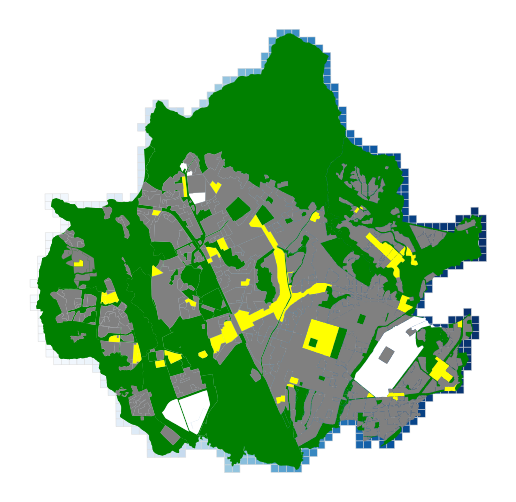

In [62]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_use_area_green.plot(color="Green",ax=ax)
suwon_use_area_fac.plot(color="White",ax=ax)
suwon_use_area_sell.plot(color="Yellow",ax=ax)
suwon_use_area_live.plot(color="Grey",ax=ax)
ax.set_axis_off()

In [12]:
suwon_use_area_sell_intersect = gpd.overlay(suwon_112_grid,suwon_use_area_sell, how="intersection")
# suwon_use_area_sell_intersect : suwon_use_area_sell와 suwon_112_grid(수원시의 grid)의 겹치는 영역 산출

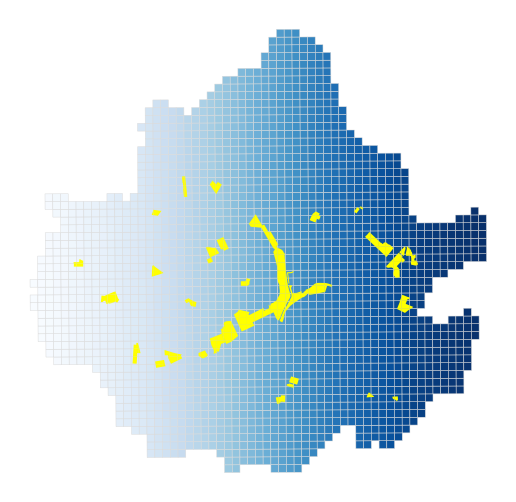

In [66]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_use_area_sell_intersect.plot(color="Yellow",ax=ax)
ax.set_axis_off()

In [67]:
suwon_use_area_sell_intersect["area"] = suwon_use_area_sell_intersect["geometry"].apply(lambda x : x.area)
# Polygon 영역 넓이 구하기
# 제곱미터로 바꿔주긴 해야할듯

suwon_use_area_sell_intersect_groupby = suwon_use_area_sell_intersect.groupby(["gid","코드명"]).agg({"area":"sum"})
# gid 별 영역 넓이 합

In [14]:
suwon_use_area_sell_intersect_groupby

,,area
gid,코드명,
다사50ab20ba,일반상업지역,7.985618e-07
다사50ab20bb,일반상업지역,4.221177e-07
다사50ba20ba,일반상업지역,2.178474e-06
다사50ba20bb,일반상업지역,1.984859e-06
다사51ab19ab,일반상업지역,2.260746e-07
...,...,...
다사61ab20ba,일반상업지역,2.087825e-06
다사61ab20bb,일반상업지역,3.536800e-06
다사61ab21aa,일반상업지역,1.252089e-06


> ## Buffer 데이터

#### 1) 사고다발지역

In [44]:
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

all_risk_area_geo = gpd.read_file("사고유형별_사고다발지역.geojson")
# 사고유형별 사고다발지역 데이터
all_risk_area_geo.head(2)

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,사고유형,geometry
0,6596147,2020015,1129013600,11290001,서울특별시 성북구1,서울특별시 성북구 하월곡동(자보습학원 부근),2,2,0,0,2,0,127.039411,37.604215,스쿨존내어린이사고,"POLYGON ((127.04211 37.60421, 127.04205 37.603..."
1,6596479,2020015,1135010200,11350001,서울특별시 노원구1,서울특별시 노원구 월계동(서울신화초교 부근),2,2,0,1,1,0,127.040824,37.632564,스쿨존내어린이사고,"POLYGON ((127.04352 37.63256, 127.04347 37.632..."


In [87]:
def buffer_격자별매핑(buffer,suwon_112_grid):
    # buffer : buffer 데이터
    # suwon_112_grid : grid 데이터
    
    buffer_intersect = gpd.overlay(suwon_112_grid, buffer, how="intersection")
    # suwon_112_grid(수원시의 grid)의 겹치는 영역 산출
    
    buffer_intersect["area"] = buffer_intersect["geometry"].apply(lambda x : x.area)
    # 넓이 구하기
    
    buffer_intersect_groupby = buffer_intersect.groupby(["gid"]).agg({"area":"sum"}).reset_index()
    # gid 별 영역 넓이 합
    
    return buffer_intersect_groupby.rename(columns={"area":"사고다발지역"})

In [91]:
buffer_격자별매핑(all_risk_area_geo,suwon_112_grid)

,gid,사고다발지역
0,다사55ab22aa,4.599198e-06
1,다사55ab22ab,1.449912e-06
2,다사55ba20bb,1.677557e-07
3,다사55ba21aa,3.179025e-07
4,다사55ba22aa,1.615781e-06
...,...,...
126,다사59bb19ab,3.998195e-06
127,다사59bb19ba,3.102553e-06
128,다사59bb19bb,4.334628e-07
129,다사60aa19ab,5.113605e-07


In [90]:
suwon_risk_area_intersect = gpd.overlay(suwon_112_grid, all_risk_area_geo, how="intersection")
# 사고다발지역과 suwon_112_grid(수원시의 grid)의 겹치는 영역 산출

suwon_risk_area_intersect.head(2)

,gid,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,사고유형,geometry
0,다사55ab22aa,6619184,2020037,4111113000,41111003,경기도 수원시 장안구3,경기도 수원시 장안구 정자동(만석사거리 부근),5,5,0,2,3,0,126.997166,37.297499,자전거사고,"POLYGON ((126.99785 37.29618, 126.99752 37.296..."
1,다사55ab22ab,6619184,2020037,4111113000,41111003,경기도 수원시 장안구3,경기도 수원시 장안구 정자동(만석사거리 부근),5,5,0,2,3,0,126.997166,37.297499,자전거사고,"POLYGON ((126.99567 37.29829, 126.99590 37.298..."


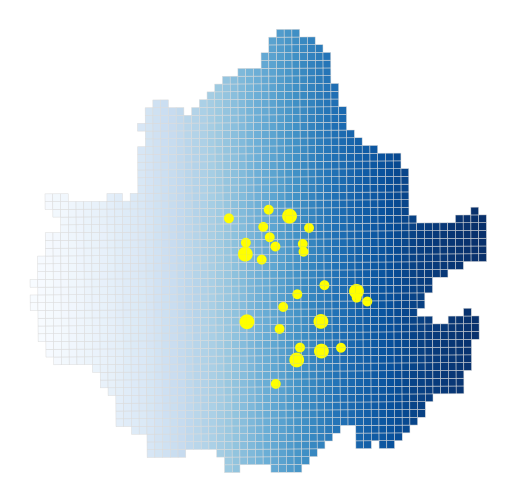

In [83]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)

suwon_risk_area_intersect.plot(color="Yellow",ax=ax)
# 사고다발지역

ax.set_axis_off()

#### 2) 치안안전시설 Buffer
- 가로등,CCTV,비상벨,방범등,편의점,치안센터,파출소,지구대,경찰서 Buffer
- 치안센터 반경 300m Buffer / 경찰서 1000 / 유흥업소 100 / 가로등 10 / cctv 100

In [190]:
suwon_street_lamp = pd.read_csv('21.수원시_가로등현황.csv')
others_security_lamp = pd.read_csv('22.4개시도_보안등현황.csv')

others_security_bell = gpd.read_file('23.4개시도_안전비상벨현황.geojson')
others_cctv = pd.read_csv('24.4개시도_CCTV설치현황.csv')
others_police = pd.read_csv('39.4개시도_경찰관서현황.csv')
others_police_box_area = gpd.read_file('12.4개시도_치안안전센터_관할경계.geojson')

suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson').drop(["rep_cnt"],axis=1)

others_alcohol = gpd.read_file('8.4개시도_유흥업소현황.geojson')
# 수원시 격자정보


In [202]:
others_alcohol.head(2)
others_alcohol = others_alcohol.drop("geometry",axis=1).rename(columns={"LAT":"lat","LON":"lon"})
# 4개 시도의 유흥업소 현황

In [192]:
others_cctv.head(2)
# 4개 시도의 CCTV

,address,purpose,cctv_cnt,set_yr,lat,lon
0,경상남도 진주시 집현면 지내리 125,어린이보호,1,`2013-12,35.241319,128.093399
1,경상남도 진주시 집현면 지내리 125,어린이보호,4,`2013-12,35.242023,128.091990


In [187]:
others_security_lamp.head(2)
# 4개 시도의 보안등

,year,address,securitylight_cnt,lon,lat
0,2016.0,경상남도 진주시 가좌동 1398,1,128.109417,35.159683
1,2010.0,경상남도 진주시 가좌동 1555-1,1,128.125589,35.152041


In [186]:
suwon_street_lamp.head(2)
# 수원의 가로등

,sgg_nm,road_addr,jibun_addr,lat,lon,install_year,install_type,manage_dept,manage_dept_pn,base_date
0,수원시,NaN,경기도 수원시 장안구 연무동 산 1-4,37.301144,127.031677,2011,전용주,도로관리과,031-228-4309,2020-08-21
1,수원시,NaN,경기도 수원시 장안구 연무동 4-25,37.300966,127.031689,2011,전용주,도로관리과,031-228-4309,2020-08-21


In [181]:
suwon_others_police = others_police[others_police["pname"] == "경기남부청"]

suwon_police = suwon_others_police[suwon_others_police["name"].str.contains("경찰서")]
suwon_police_box = suwon_others_police[suwon_others_police["name"].str.contains("경찰서")== False]

In [183]:
suwon_police
# 수원의 경찰서

,pname,psname,name,lon,lat,addr
202,경기남부청,수원남부경찰서,수원남부경찰서,127.054428,37.272159,수원시 매탄2동 1196
285,경기남부청,수원서부경찰서,수원서부경찰서,126.972270,37.258757,수원시 권선구 탑동 911
287,경기남부청,수원중부경찰서,수원중부경찰서,126.996282,37.297956,수원시 장안구 정자3동 873-4


In [184]:
suwon_police_box.head(3)
# 수원의 치안센터

,pname,psname,name,lon,lat,addr
196,경기남부청,수원남부경찰서,곡선지구대,127.030039,37.251801,권선구 권선동 1268-5
197,경기남부청,수원남부경찰서,광교파출소,127.047712,37.289558,경기도 수원시 영통구 이의동 1347-2
198,경기남부청,수원남부경찰서,권선파출소,127.026288,37.260749,권선구 권선동1012


In [161]:
def point_buffer_격자별매핑(data_df,suwon_grid,col,buffer_num):
    # col : 경찰서, 치안센터, cctv (str)
    # buffer_num : 치안안전시설에 따라 10,300,1000 (int)
    
    df = data_df.copy()
    epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
    df['Point'] = df.apply(lambda x : Point([x['lon'], x['lat']]), axis=1)
    df = gpd.GeoDataFrame(df, geometry='Point', crs = epsg4326).to_crs(epsg="5186")
    # Buffer 부여하기 위해서 Point 임시 epsg 5186 좌표계로 변환

    df["geometry"] = df["Point"].apply(lambda x : x.buffer(buffer_num))
    df = df.drop("Point",axis=1)
    df = gpd.GeoDataFrame(df, geometry='geometry').to_crs(epsg="4326")
    # Buffer 부여한 뒤에 epsg 4326 좌표계로 변환

    df['Point'] = df.apply(lambda x : Point([x['lon'], x['lat']]), axis=1)
    # drop한 좌표 다시 넣어주기
    
    df_intersect = gpd.overlay(suwon_grid,df, how="intersection")
    df_intersect[col+"_Buffer면적"] = df_intersect["geometry"].apply(lambda x : x.area)
    # 겹치는 면적 구하기

    df_intersect_sum = df_intersect.groupby("gid").agg({col+"_Buffer면적":"sum"}).reset_index()
    return df_intersect,df_intersect_sum

#### Buffer 구해주기
- 치안센터 반경 300 / 경찰서 1000 / 유흥업소 100 / 가로등 10 / cctv 100

In [ ]:
suwon_police_buffer,suwon_police_buffer_sum = point_buffer_격자별매핑(suwon_police,suwon_112_grid,"경찰서",1000)
# 수원 경찰서

suwon_police_box_buffer,suwon_police_box_buffer_sum = point_buffer_격자별매핑(suwon_police_box,suwon_112_grid,"치안센터",300)
# 수원 치안센터

others_security_lamp_buffer,others_security_lamp_buffer_sum = point_buffer_격자별매핑(others_security_lamp,suwon_112_grid,"보안등",10)
# 수원 보안등

suwon_street_lamp_buffer,suwon_street_lamp_buffer_sum = point_buffer_격자별매핑(suwon_street_lamp,suwon_112_grid,"가로등",10)
# 수원 가로등

others_cctv_buffer,others_cctv_buffer_sum = point_buffer_격자별매핑(others_cctv,suwon_112_grid,"CCTV",100)
# 수원 CCTV

others_alcohol_buffer,others_alcohol_buffer_sum = point_buffer_격자별매핑(others_alcohol,suwon_112_grid,"유흥업소",100)
# 수원 유흥업소

시각화해보기

<AxesSubplot:>

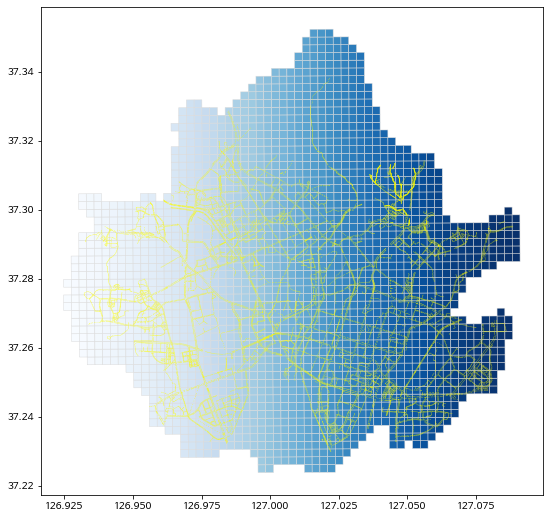

In [196]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_street_lamp_buffer.plot(color="Yellow",ax=ax)
# 가로등

<AxesSubplot:>

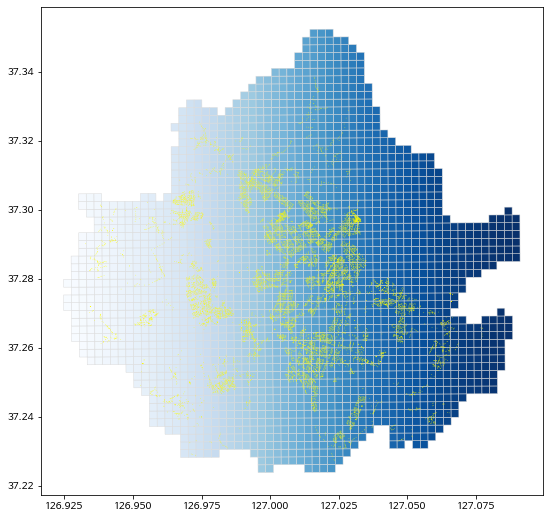

In [197]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
others_security_lamp_buffer.plot(color="Yellow",ax=ax)
# 보안등

<AxesSubplot:>

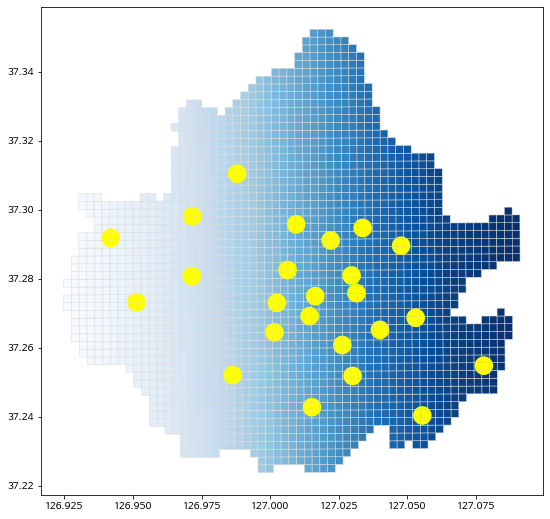

In [198]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_police_box_buffer.plot(color="Yellow",ax=ax)
# 치안센터

<AxesSubplot:>

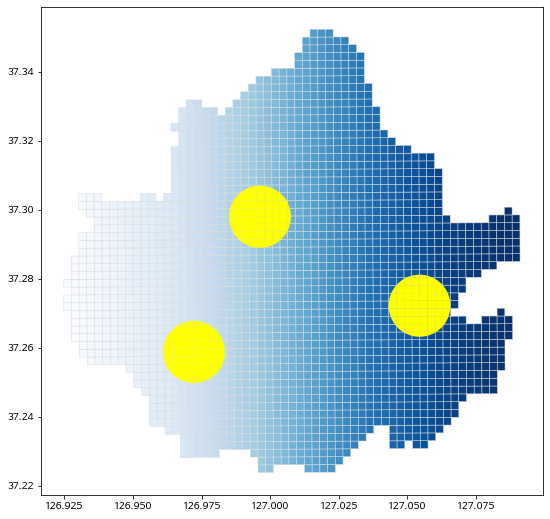

In [199]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
suwon_police_buffer.plot(color="Yellow",ax=ax)
# 경찰서

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
others_alcohol_buffer.plot(color="Yellow",ax=ax)
# 유흥업소

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
suwon_112_grid.plot(linewidth=0.5,cmap="Blues" ,ax=ax, edgecolor = 'gainsboro', legend=True)
others_cctv_buffer.plot(color="Yellow",ax=ax)
# CCTV